# UE02 - RDF and RDF Schema

Before you start with this notebook, complete the eight tasks in the `1. RDF` sheet of `SemAI.jar`. You will then make use of your solutions in this notebook. 

## Task 0: Preparation

Preparation (Installs and Imports). 




In [ ]:
# Install required packages in the current Jupyter kernel
!pip install -q rdflib
!pip install -q pydot
!pip install -q owlrl

!pip install networkx pyvis

import rdflib
from rdflib import Graph, Literal, RDF, URIRef, BNode, Namespace, Dataset
import networkx as nx
from pyvis.network import Network
import requests
from IPython.display import display, HTML, Image
import os
import pydot
import owlrl
from rdflib.namespace import FOAF , XSD , RDFS 



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.6 MB/s eta 0:00:00


## Task 1:  Improve interactive RDF graph visualization (1 pt)

Improve function `visualize_graph_pyvis` (from `V01_rdf.ipynb`) as follows:
- an optional `base` parameter
- abbreviate the labels of nodes and edges in the same way as in `visualize_graph`. 
- make sure that blank node IDs are not shown in the visualization. 

Optional features: 
- use different graphical forms for literals and URIs
- (add further improvements as you like)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [ ]:
rdf_str = """BASE   <http://example.org/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX wd: <http://www.wikidata.org/entity/>
 
<bob#me>
   a foaf:Person ;
   foaf:knows <alice#me> ;
   schema:birthDate "1990-07-04"^^xsd:date ;
   foaf:topic_interest wd:Q12418 .
   
wd:Q12418
  dcterms:title "Mona Lisa" ;
  dcterms:creator <http://dbpedia.org/resource/Leonardo_da_Vinci> .

<http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619>
  dcterms:subject wd:Q12418 .
"""




## Task 2:  Print RDF graph as HTML table (1 pt)

Implement a function `rdf2htmltable(g)` that 
- takes as parameter an rdflib.Graph 
- generates and displays an HTML table representing that graph with
  - one line per RDF statement 
  - three columns (subject, predicate, object) 
  - URIs should be shown in abbreviated form and be represented as links (`href=<full URI>`)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [ ]:
from collections import defaultdict


def rdf2htmltable(g):
    # get the namespace manager from the graph object
    ns_manager = g.namespace_manager

    # create the table header
    table = "<table>\n<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>\n"
    
    # get n-triples and replace URIs with abbreviated form
    nTriples = g.serialize(format="ntriples")
    print("yes")

    # iterate over triples in the graph and add rows to the table
    for triple in nTriples.split("\n"):
        # add row to table
        table += "<tr>"
        triple = triple.replace("\n", "").replace("<", "")

        # split n-triple line and iterate over s,p,o
        for object in triple.split(">")[:3]:
          object = object.strip()
          table += "<td>"
          
          isLinkAdded = False
          # see if object contains URI
          for prefix, uri in ns_manager.namespaces():
            if uri in object:
              # replace URI abbreviation and add link
              table += "<a href = " + object + ">" + object.replace(uri, prefix + ":") + "</a>"
              isLinkAdded = True
              break

          # add long-version only if nothing has been abbreviated
          if not isLinkAdded:
            table += object

          table += "</td>"

        table += "</tr>\n"

    # close table and return
    table += "</table>"
    return table

# test
g = Graph()
intro_graph = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John rdf:type foaf:Person; foaf:knows ex:Mary.


"""
g.parse(format="turtle",data=intro_graph)

#print(rdf2htmltable(g))

g = Graph()
g.parse(format="text/turtle",data=rdf_str)
#print(rdf2htmltable(g))


yes
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = _:ne8d75022494c422f8a780ae99b3b8b70b1 http://xmlns.com/foaf/0.1/knows>_:ne8d75022494c422f8a780ae99b3b8b70b1 foaf:knows</a></td><td><a href = http://www.ex.org/Mary>ex:Mary</a></td><td>.</td></tr>
<tr><td><a href = _:ne8d75022494c422f8a780ae99b3b8b70b1 http://www.w3.org/1999/02/22-rdf-syntax-ns#type>_:ne8d75022494c422f8a780ae99b3b8b70b1 rdf:type</a></td><td><a href = http://xmlns.com/foaf/0.1/Person>foaf:Person</a></td><td>.</td></tr>
<tr><td><a href = http://www.ex.org/John>ex:John</a></td><td><a href = http://xmlns.com/foaf/0.1/knows>foaf:knows</a></td><td>_:ne8d75022494c422f8a780ae99b3b8b70b1 .</td></tr>
<tr><td></td></tr>
</table>


## Task 3: A function for parsing and displaying an RDF graph (1 pt)

A function `parse_display_rdf(str)` that takes as parameter a string which represents an RDF graph in Turtle notation and 
- produces an rdflib.Graph from that string
- prints the graph in Turte notation
- prints the graph in RDF/XML
- visualizes it using `visualize_graph` (to be taken from `V01_rdf.ipynb`)
- visualizes it using (your improved version of) `visualize_graph_pyvis`
- outputs it using `rdf2htmltable` (only if you have implemented this function)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

---------------------------------------------------------------------------------------
TEST WITH rdf_str
---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix schema: <http://schema.org/> .
@prefix wd: <http://www.wikidata.org/entity/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619> dcterms:subject wd:Q12418 .

<http://example.org/bob#me> a foaf:Person ;
    schema:birthDate "1990-07-04"^^xsd:date ;
    foaf:knows <http://example.org/alice#me> ;
    foaf:topic_interest wd:Q12418 .

wd:Q12418 dcterms:creator <http://dbpedia.org/resource/Leonardo_da_Vinci> ;
    dcterms:title "Mona Lisa" .




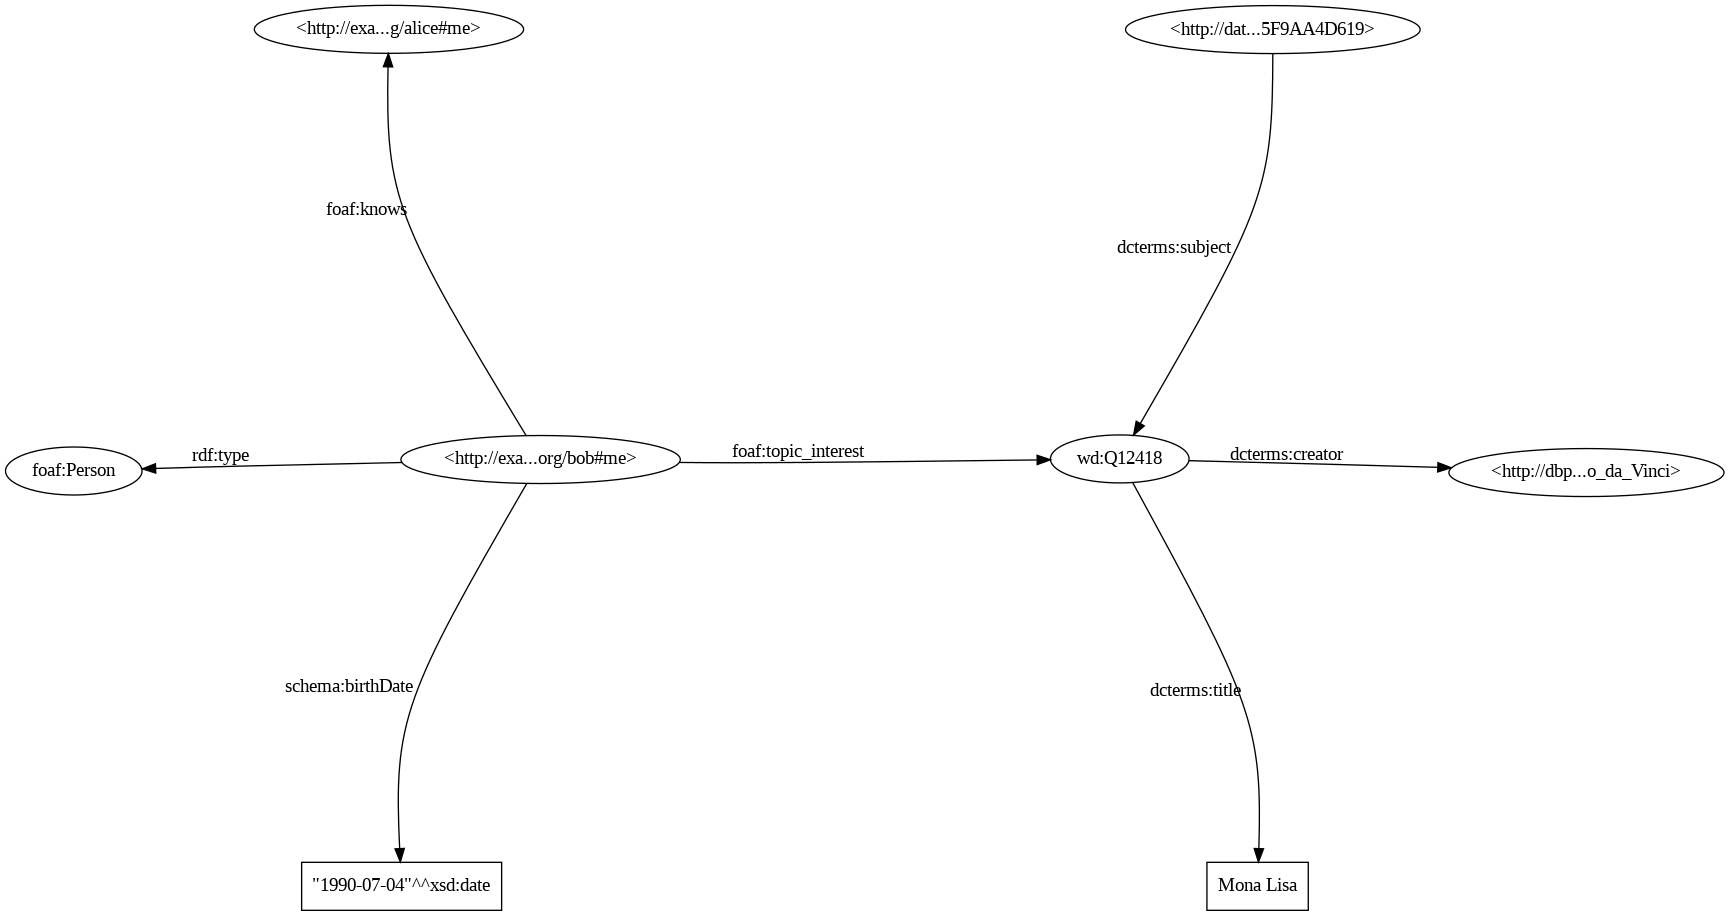

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td>http://example.org/bob#me</td><td><a href = http://xmlns.com/foaf/0.1/topic_interest>foaf:topic_interest</a></td><td><a href = http://www.wikidata.org/entity/Q12418>wd:Q12418</a></td></tr>
<tr><td>http://example.org/bob#me</td><td><a href = http://xmlns.com/foaf/0.1/knows>foaf:knows</a></td><td>http://example.org/alice#me</td></tr>
<tr><td><a href = http://www.wikidata.org/entity/Q12418>wd:Q12418</a></td><td><a href = http://purl.org/dc/terms/creator>dcterms:creator</a></td><td>http://dbpedia.org/resource/Leonardo_da_Vinci</td></tr>
<tr><td>http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619</td><td><a href = http://purl.org/dc/terms/subject>dcterms:subject</a></td><td><a href = http://www.wikidata.org/e

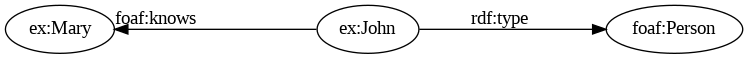

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/John>ex:John</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://xmlns.com/foaf/0.1/Person>foaf:Person</a></td></tr>
<tr><td><a href = http://www.ex.org/John>ex:John</a></td><td><a href = http://xmlns.com/foaf/0.1/knows>foaf:knows</a></td><td><a href = http://www.ex.org/Mary>ex:Mary</a></td></tr>
<tr><td></td></tr>
</table>


In [ ]:
def parse_display_rdf(str):
  # produce rdflib.Graph
  g = Graph()
  g.parse(format="turtle", data = str)

  
  # print graph in turtle
  print_section("Turtle")
  print(g.serialize(format = "turtle"))

  # print graph in RDF/XML
  print_section("RDF/XML")
  print(g.serialize(format="xml"))

  # visualize graph
  visualize_graph(g)

  # improved version not implemented

  # serialize as html
  print_section("HTML Table")
  print(rdf2htmltable(g))




def print_section(str):
  section = "---------------------------------------------------------------------------------------"
  print(section)
  print(str)
  print(section)

# A function to produce a graphical visualization of an RDF graph
def visualize_graph(g,base=None):

  def node_id(graph,term):
    if isinstance(term,Literal): return term.n3(graph.namespace_manager)
    else: return f"\"{term.n3(graph.namespace_manager)}\""

  def add_node(dg,g,t,base):
    if isinstance(t,URIRef):
      lbl = f"\"{t.n3(g.namespace_manager)}\""
      if(base): lbl = lbl.replace(base,"")
      if(len(lbl)>25): lbl = lbl[:12] + "..." +  lbl[-12:] 
      dg.add_node(pydot.Node( node_id(g,t), label=lbl ))
    if isinstance(t,Literal):
      dg.add_node(pydot.Node( node_id(g,t), label=t.n3(g.namespace_manager), shape="box"))
    if isinstance(t,BNode):
      dg.add_node(pydot.Node( node_id(g,t), label=""))    

  def add_edge(dg,g,s,p,o):
    dg.add_edge(pydot.Edge(node_id(g,s), node_id(g,o), label=f"\"{p.n3(g.namespace_manager)}\""))

  dg = pydot.Dot('my_graph', graph_type='digraph',layout='sfdp', splines='curved' )

  for subj in g.subjects(None,None): add_node(dg,g,subj,base)
  for obj in g.objects(None,None): add_node(dg,g,obj,base)
  for (s,p,o) in g: add_edge(dg,g,s,p,o)   

  display(Image(dg.create_png()))

print_section("TEST WITH rdf_str")
parse_display_rdf(rdf_str)

print_section("TEST WITH 0. Intro")
parse_display_rdf(intro_graph)



# Tasks 4-10 (1 point each)

For each of the remaining 7 tasks in the "1. RDF" sheet in `SemAI.jar` do the following: 
- add a text cell in this notebook 
  - with the description of the task from `SemAI.jar` 
  - with number and title (e.g., **1. Simple Data Graph**)  from `SemAI.jar` as header 
- add a code cell where you apply `parse_display_rdf(str)` on your solution




# 1. Simple Data Graph

Create an RDF graph in Turtle notation. Use the FOAF vocabulary to state the following.

Mary and Jim are persons.
Mary knows Jim.
Mary is 27 years old.
The URIs for the two persons should be http://www.ex.org/person#Mary and http://www.ex.org/person#Jim. The age of Mary should be represented as an integer.

---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix : <http://www.ex.org/person#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

:Mary a foaf:Person ;
    foaf:age 27 ;
    foaf:knows :Jim .

:Jim a foaf:Person .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/person#Mary">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <foaf:knows rdf:resource="http://www.ex.org/person#Jim"/>
    <foaf:age rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">

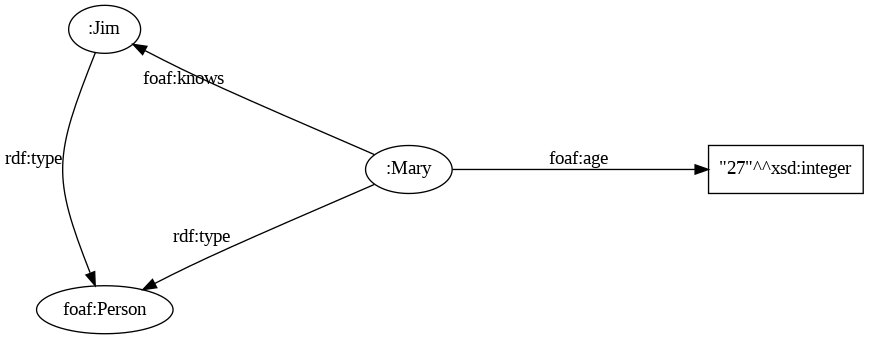

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/person#Mary>:Mary</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://xmlns.com/foaf/0.1/Person>foaf:Person</a></td></tr>
<tr><td><a href = http://www.ex.org/person#Mary>:Mary</a></td><td><a href = http://xmlns.com/foaf/0.1/age>foaf:age</a></td><td><a href = "27"^^http://www.w3.org/2001/XMLSchema#integer>"27"^^xsd:integer</a></td></tr>
<tr><td><a href = http://www.ex.org/person#Mary>:Mary</a></td><td><a href = http://xmlns.com/foaf/0.1/knows>foaf:knows</a></td><td><a href = http://www.ex.org/person#Jim>:Jim</a></td></tr>
<tr><td><a href = http://www.ex.org/person#Jim>:Jim</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:t

In [ ]:
task1 = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix :     <http://www.ex.org/person#> .


:Mary rdf:type foaf:Person .
:Jim rdf:type foaf:Person .

:Mary foaf:knows :Jim .

:Mary foaf:age "27"^^xsd:integer .
"""

parse_display_rdf(task1)

# 2. Simple Schema

Create a vocabulary using RDFS in Turtle. Specify

Classes Company, Employee, and Person
Property worksFor between Employee and Company
Property salary of Employee with Integer as data type
Class Employee is a subclass of Person
Use XSD for data types. The URIs of classes and properties are in namespace <http://www.ex.org/vocabulary#>, for example, <http://www.ex.org/vocabulary#Company>

---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix : <http://www.ex.org/vocabulary#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

:Company a rdfs:Class .

:Employee a rdfs:Class ;
    rdfs:subClassOf :Person .

:Person a rdfs:Class .

:salary a rdf:Property ;
    rdfs:domain :Employee ;
    rdfs:range xsd:integer .

:worksFor a rdf:Property ;
    rdfs:domain :Employee ;
    rdfs:range :Company .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/r

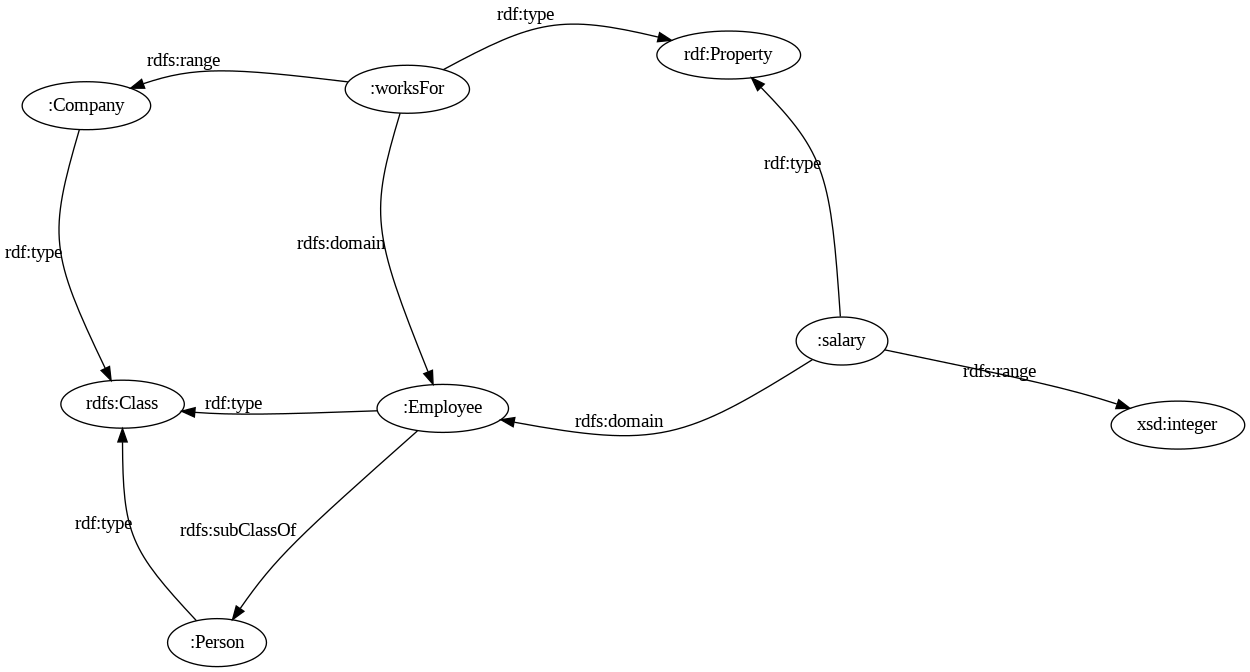

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/vocabulary#Employee>:Employee</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.w3.org/2000/01/rdf-schema#Class>rdfs:Class</a></td></tr>
<tr><td><a href = http://www.ex.org/vocabulary#worksFor>:worksFor</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#Property>rdf:Property</a></td></tr>
<tr><td><a href = http://www.ex.org/vocabulary#salary>:salary</a></td><td><a href = http://www.w3.org/2000/01/rdf-schema#range>rdfs:range</a></td><td><a href = http://www.w3.org/2001/XMLSchema#integer>xsd:integer</a></td></tr>
<tr><td><a href = http://www.ex.org/vo

In [ ]:
task = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix  :   <http://www.ex.org/vocabulary#> .

:Company a rdfs:Class .


:Person a rdfs:Class .


:Employee a rdfs:Class ; rdfs:subClassOf :Person .

:worksFor a rdf:Property ; rdfs:domain :Employee ; rdfs:range :Company .

:salary a rdf:Property; rdfs:domain :Employee ; rdfs:range xsd:integer .
"""

parse_display_rdf(task)

# 3. Reification
Create an RDF graph in Turtle notation. Use the RDF vocabulary where applicable and the example namesspace (ex:) for all other resources (ex:Mary, ex:John, ex:says, ex:loves). Hint: the lecture slides contain a similar reification example.

Mary says that John loves her.


---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix ex: <http://www.ex.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ex:Mary ex:says ex:stmt .

ex:stmt a rdf:Statement ;
    rdf:object ex:Mary ;
    rdf:predicate ex:loves ;
    rdf:subject ex:John .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ex="http://www.ex.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/stmt">
    <rdf:type rdf:resource="http://www.w3.org/1999/02/22-rdf-syntax-ns#Statement"/>
    <rdf:subject rdf:resource="http://www.ex.org/John"/>
    <rdf:predicate rdf:resource="http://www.ex.org/loves"/>
   

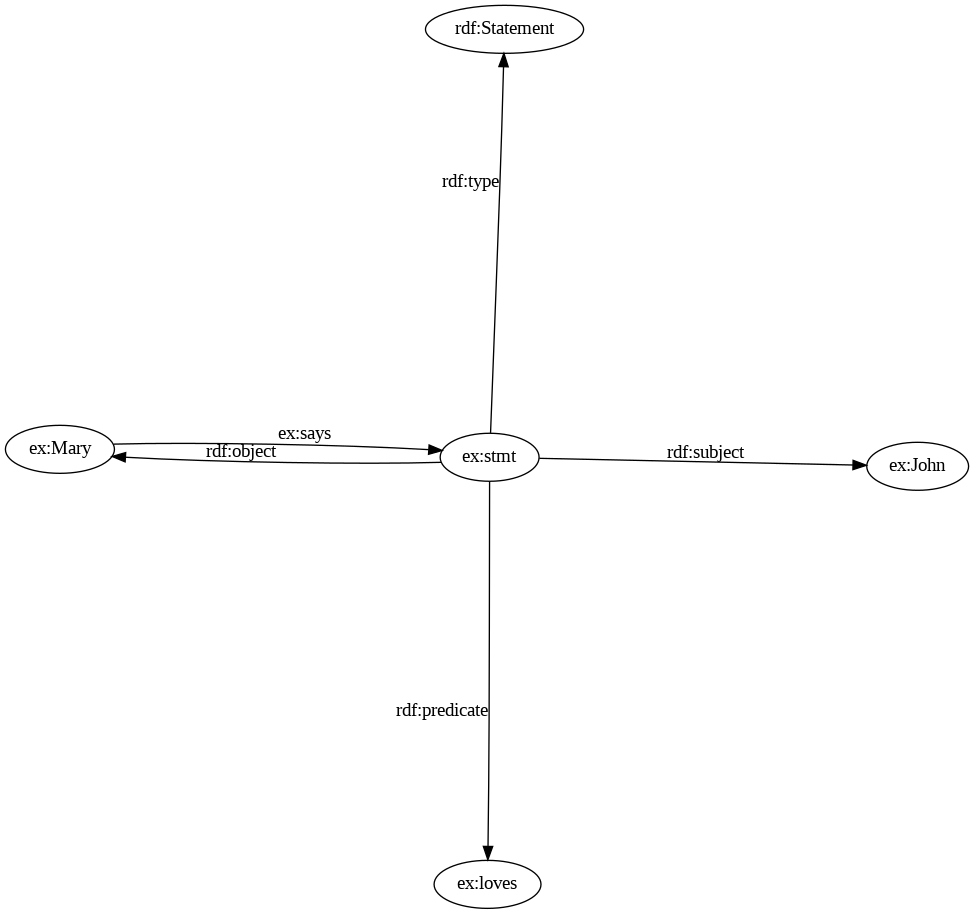

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/stmt>ex:stmt</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#predicate>rdf:predicate</a></td><td><a href = http://www.ex.org/loves>ex:loves</a></td></tr>
<tr><td><a href = http://www.ex.org/stmt>ex:stmt</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#subject>rdf:subject</a></td><td><a href = http://www.ex.org/John>ex:John</a></td></tr>
<tr><td><a href = http://www.ex.org/Mary>ex:Mary</a></td><td><a href = http://www.ex.org/says>ex:says</a></td><td><a href = http://www.ex.org/stmt>ex:stmt</a></td></tr>
<tr><td><a href = http://www.ex.org/stmt>ex:stmt</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.w3.org/1

In [ ]:
task = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:stmt a rdf:Statement ; rdf:subject ex:John ; rdf:predicate ex:loves ; rdf:object ex:Mary .

ex:Mary ex:says ex:stmt .
"""

parse_display_rdf(task)

# 4. Blank Node

Create an RDF graph in Turtle notation. Use the RDF and FOAF vocabularies where applicable and the example namesspace (ex:) for the other resources.

John knows a person, who knows Mary.
Use a blank node to represent that anonymous person.

---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix ex: <http://www.ex.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

ex:John foaf:knows [ a foaf:Person ;
            foaf:knows ex:Mary ] .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:nodeID="n1b2834f484aa4f798910d64ff0d83829b1">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <foaf:knows rdf:resource="http://www.ex.org/Mary"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/John">
    <foaf:knows rdf:nodeID="n1b2834f484aa4f798910d64ff0d83829

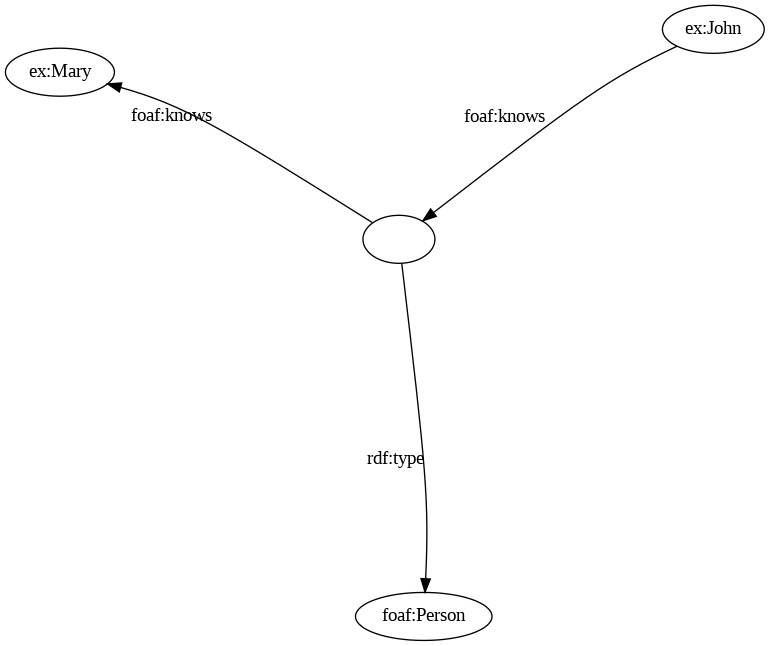

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
yes
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = _:n1b2834f484aa4f798910d64ff0d83829b1 http://xmlns.com/foaf/0.1/knows>_:n1b2834f484aa4f798910d64ff0d83829b1 foaf:knows</a></td><td><a href = http://www.ex.org/Mary>ex:Mary</a></td><td>.</td></tr>
<tr><td><a href = _:n1b2834f484aa4f798910d64ff0d83829b1 http://www.w3.org/1999/02/22-rdf-syntax-ns#type>_:n1b2834f484aa4f798910d64ff0d83829b1 rdf:type</a></td><td><a href = http://xmlns.com/foaf/0.1/Person>foaf:Person</a></td><td>.</td></tr>
<tr><td><a href = http://www.ex.org/John>ex:John</a></td><td><a href = http://xmlns.com/foaf/0.1/knows>foaf:knows</a></td><td>_:n1b2834f484aa4f798910d64ff0d83829b1 .</td></tr>
<tr><td></td></tr>
</table>


In [ ]:
task = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John foaf:knows [ a foaf:Person ; foaf:knows ex:Mary  ] .
"""

parse_display_rdf(task)

# 5. Multiple Classification

Create an RDF graph in Turtle notation. Use the RDF vocabulary where applicable and the example namesspace (ex:) for the other resources.

John is an instance of SoccerPlayer and of Student.



---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix ex: <http://www.ex.org/> .

ex:John a ex:SoccerPlayer,
        ex:Student .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/John">
    <rdf:type rdf:resource="http://www.ex.org/SoccerPlayer"/>
    <rdf:type rdf:resource="http://www.ex.org/Student"/>
  </rdf:Description>
</rdf:RDF>



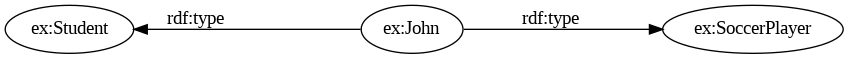

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
yes
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/John>ex:John</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.ex.org/SoccerPlayer>ex:SoccerPlayer</a></td></tr>
<tr><td><a href = http://www.ex.org/John>ex:John</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.ex.org/Student>ex:Student</a></td></tr>
<tr><td></td></tr>
</table>


In [ ]:
task = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:John a ex:SoccerPlayer; a ex:Student .
"""

parse_display_rdf(task)

# 6. Metamodeling

Create an RDF graph in Turtle notation. Use the RDF and RDF Schema vocabularies where applicable and the example namesspace (ex:) for the other resources.

Dog and Cat are instances of Species and subclasses of Animal.
Lassie is an instance of Dog.

---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix ex: <http://www.ex.org/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:Cat a ex:Species ;
    rdfs:subClassOf ex:Animal .

ex:Lassie a ex:Dog .

ex:Dog a ex:Species ;
    rdfs:subClassOf ex:Animal .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://www.ex.org/Cat">
    <rdf:type rdf:resource="http://www.ex.org/Species"/>
    <rdfs:subClassOf rdf:resource="http://www.ex.org/Animal"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/Do

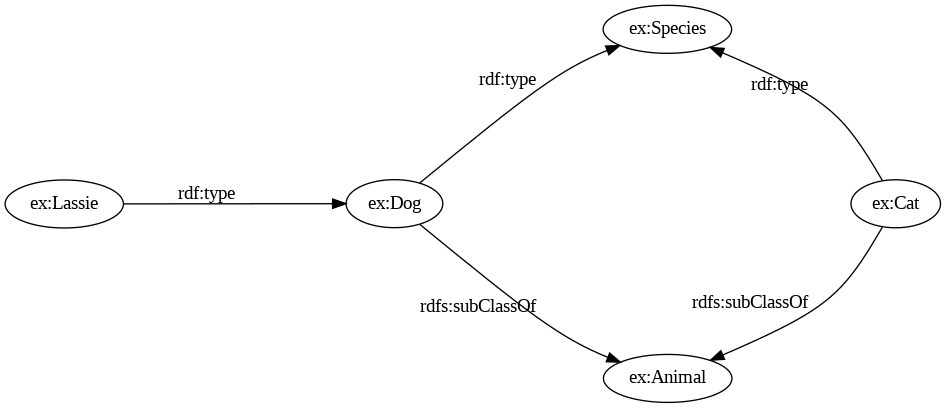

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
yes
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/Cat>ex:Cat</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.ex.org/Species>ex:Species</a></td></tr>
<tr><td><a href = http://www.ex.org/Dog>ex:Dog</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.ex.org/Species>ex:Species</a></td></tr>
<tr><td><a href = http://www.ex.org/Dog>ex:Dog</a></td><td><a href = http://www.w3.org/2000/01/rdf-schema#subClassOf>rdfs:subClassOf</a></td><td><a href = http://www.ex.org/Animal>ex:Animal</a></td></tr>
<tr><td><a href = http://www.ex.org/Cat>ex:Cat</a></td><td><a href = http://www.w3.org/2000/01/rdf-schema#subClassOf>rdfs:subClassOf</a></td

In [ ]:
task = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:Dog a ex:Species ; rdfs:subClassOf ex:Animal .
ex:Cat a ex:Species ;
rdfs:subClassOf ex:Animal .

ex:Lassie a ex:Dog .
"""

parse_display_rdf(task)

# 7. Properties

Create an RDF graph in Turtle notation. Use the RDF and RDF Schema vocabularies where applicable and the example namesspace (ex:) for the other resources, e.g., ex:childOf, ex:descendantOf.

Everyone who is a child of someone, is also a descendant of that someone.

---------------------------------------------------------------------------------------
Turtle
---------------------------------------------------------------------------------------
@prefix ex: <http://www.ex.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:childOf a rdf:Property ;
    rdfs:subPropertyOf ex:descendantOf .


---------------------------------------------------------------------------------------
RDF/XML
---------------------------------------------------------------------------------------
<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://www.ex.org/childOf">
    <rdf:type rdf:resource="http://www.w3.org/1999/02/22-rdf-syntax-ns#Property"/>
    <rdfs:subPropertyOf rdf:resource="http://www.ex.org/descendantOf"/>
  </rdf:Description>
</rdf:RDF>



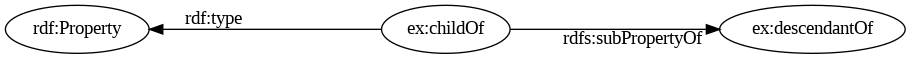

---------------------------------------------------------------------------------------
HTML Table
---------------------------------------------------------------------------------------
yes
<table>
<tr><th>Subject</th><th>Predicate</th><th>Object</th></tr>
<tr><td><a href = http://www.ex.org/childOf>ex:childOf</a></td><td><a href = http://www.w3.org/2000/01/rdf-schema#subPropertyOf>rdfs:subPropertyOf</a></td><td><a href = http://www.ex.org/descendantOf>ex:descendantOf</a></td></tr>
<tr><td><a href = http://www.ex.org/childOf>ex:childOf</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#type>rdf:type</a></td><td><a href = http://www.w3.org/1999/02/22-rdf-syntax-ns#Property>rdf:Property</a></td></tr>
<tr><td></td></tr>
</table>


In [ ]:
task = """
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:childOf a rdf:Property ;
rdfs:subPropertyOf ex:descendantOf .
"""

parse_display_rdf(task)
